In [1]:
import numpy as np
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler

mfcc = pd.read_csv('mfcc_not_scaled.csv', index_col = 0, header = [0,1,2])

#mfcc = mfcc.drop(mfcc.columns[[12,13,14,15,16,17,18,19,32,33,34,35,36,37,38,39,52,53,54,55,56,57,58,59,72,73,74,75,76,77,78,79,92,93,94,95,96,97,98,99,112,113,114,115,116,117,118,119,132,133,134,135,136,137,138,139]], axis=1)


chroma = pd.read_csv('chroma_not_scaled.csv', index_col = 0, header = [0,1,2])
zcr = pd.read_csv('zcr_not_scaled.csv', index_col = 0, header = [0,1])
centroid_rolloff = pd.read_csv('centroid_rolloff_bandwidth_not_scaled.csv', index_col = 0, header = [0,1])
contrast = pd.read_csv('contrast_not_scaled.csv', index_col = 0, header = [0,1,2])

#pitch_changes = pd.read_csv('pitch_changes.csv', index_col = 0, header = [0])

unscaled_df = mfcc.join([chroma, zcr, centroid_rolloff, contrast])
unscaled_df = unscaled_df.dropna()

ipd.display(unscaled_df)


unscaled_df.to_csv('complete_unscaled_dataset.csv')

,"(mfcc, mean, 1)","(mfcc, mean, 2)","(mfcc, mean, 3)","(mfcc, mean, 4)","(mfcc, mean, 5)","(mfcc, mean, 6)","(mfcc, mean, 7)","(mfcc, mean, 8)","(mfcc, mean, 9)","(mfcc, mean, 10)",...,"(contrast, skew, 3)","(contrast, skew, 4)","(contrast, skew, 5)","(contrast, skew, 6)","(contrast, kurtosis, 1)","(contrast, kurtosis, 2)","(contrast, kurtosis, 3)","(contrast, kurtosis, 4)","(contrast, kurtosis, 5)","(contrast, kurtosis, 6)"
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.643892,-1.232145,-0.298110,-0.949567,-0.462216,0.159492,-0.003322,0.179328,-0.272375,-0.166579,...,-0.448939,-0.029435,0.090195,0.582754,1.246656,-0.232739,-0.428676,0.028733,-0.003168,0.018854
5,0.270488,-0.643528,0.581130,-0.176472,-0.276552,0.432165,-0.408263,1.532433,-0.283644,-0.324987,...,-1.121583,-0.636879,-0.181506,0.884934,-0.418297,0.540123,-0.432320,0.493790,0.043739,1.114180
10,1.121521,-0.451553,-1.759735,0.355386,-0.561454,-0.560480,-0.035916,-0.129908,-0.155199,-0.245175,...,-0.180978,0.001738,-0.028454,-0.095523,1.138346,0.095012,-0.089139,0.587628,1.330172,0.196729
140,-1.367652,-0.262616,1.516007,0.563424,1.878015,0.327490,1.379521,0.195044,0.647752,0.638997,...,-0.143601,0.664160,0.302908,0.907876,0.554784,-0.328119,-0.057213,0.789910,-0.041208,0.415244
141,-0.700861,0.139932,0.046463,-0.055100,0.571697,-1.159243,1.047132,-1.012609,0.547770,-0.012894,...,-1.518500,-1.248451,-0.578213,1.209552,-1.082865,-0.367900,-0.289165,-0.059534,-0.538509,0.615283


In [8]:
import numpy as np
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = pd.read_csv('complete_unscaled_dataset2.csv', index_col = 0, header = [0])

tracks_genres = pd.read_csv('tracks_genres_mio2.csv', index_col = 0, header = [0])
#Alcune tracce presenti in tracks_genres.csv potrebbero non funzionare, quindi tengo solo le tracce di cui sono riuscito ad estrarre le feature
y = tracks_genres.loc[X.index,  'genre']

#Divido training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#Fit e scaling sul training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Oversampling dei dati di training
#SMOTE resampling
#from imblearn.over_sampling import SMOTE, ADASYN
#X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_scaled, y_train)

#Oversampling dei dati di training
#SVM SMOTE resampling
#from imblearn.over_sampling import SVMSMOTE
#X_train_resampled, y_train_resampled = SVMSMOTE().fit_resample(X_train_scaled, y_train)

#Oversampling dei dati di training
#k means SMOTE resampling
from imblearn.over_sampling import KMeansSMOTE
X_train_resampled, y_train_resampled = KMeansSMOTE().fit_resample(X_train_scaled, y_train)

#SMOTE ENN (smote + pulizia)
#from imblearn.combine import SMOTEENN
#smote_enn = SMOTEENN(random_state=42)
#X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

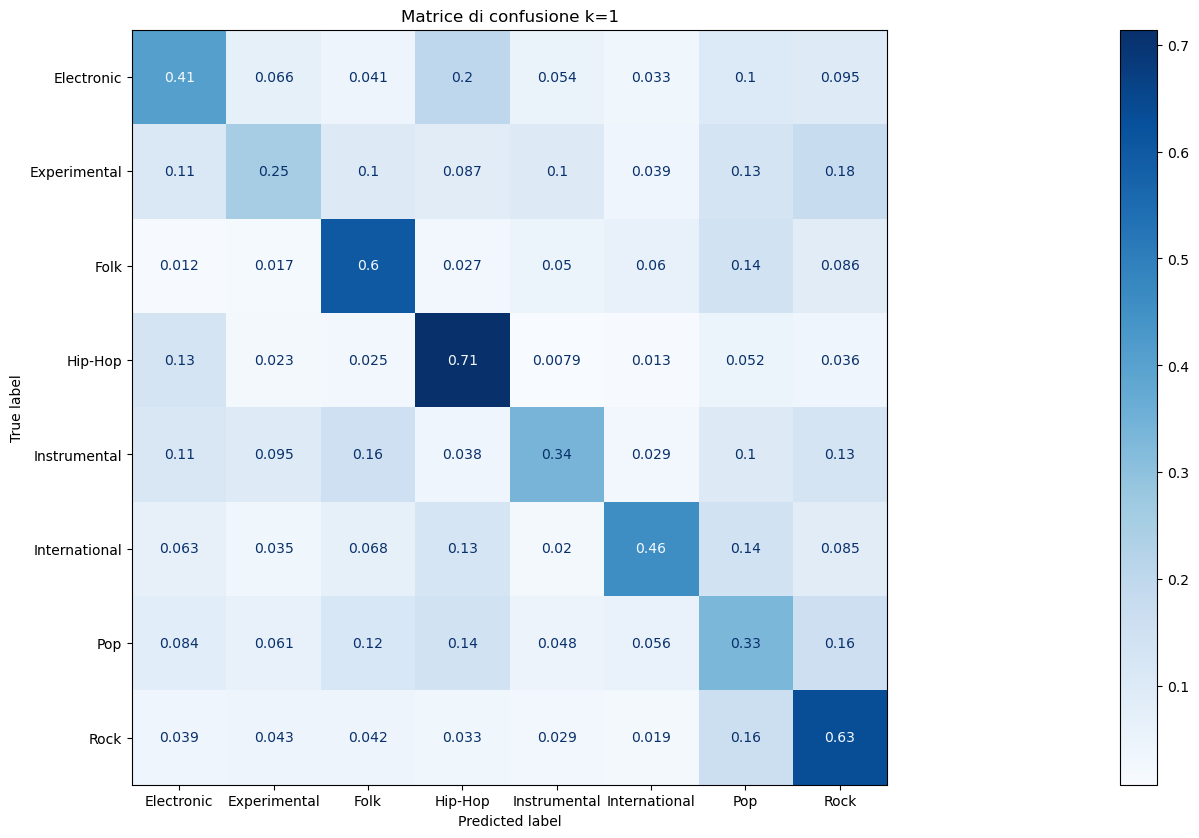

               precision    recall  f1-score   support

   Electronic       0.63      0.41      0.49      2104
 Experimental       0.31      0.25      0.28       739
         Folk       0.51      0.60      0.56       915
      Hip-Hop       0.51      0.71      0.59      1136
 Instrumental       0.41      0.34      0.37       718
International       0.43      0.46      0.44       457
          Pop       0.20      0.33      0.25       765
         Rock       0.68      0.63      0.65      2337

     accuracy                           0.50      9171
    macro avg       0.46      0.47      0.46      9171
 weighted avg       0.53      0.50      0.50      9171



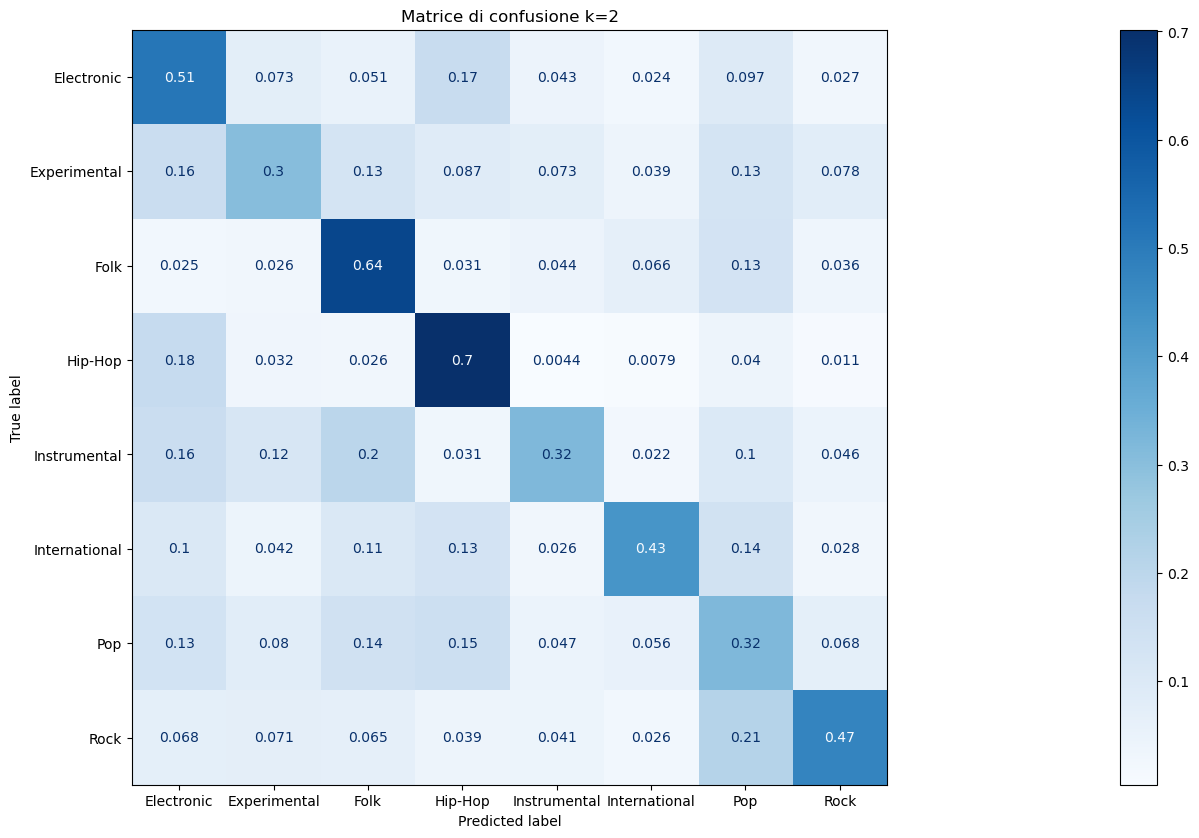

               precision    recall  f1-score   support

   Electronic       0.58      0.51      0.55      2104
 Experimental       0.29      0.30      0.30       739
         Folk       0.46      0.64      0.54       915
      Hip-Hop       0.52      0.70      0.60      1136
 Instrumental       0.41      0.32      0.36       718
International       0.42      0.43      0.42       457
          Pop       0.18      0.32      0.23       765
         Rock       0.81      0.47      0.60      2337

     accuracy                           0.49      9171
    macro avg       0.46      0.46      0.45      9171
 weighted avg       0.54      0.49      0.50      9171



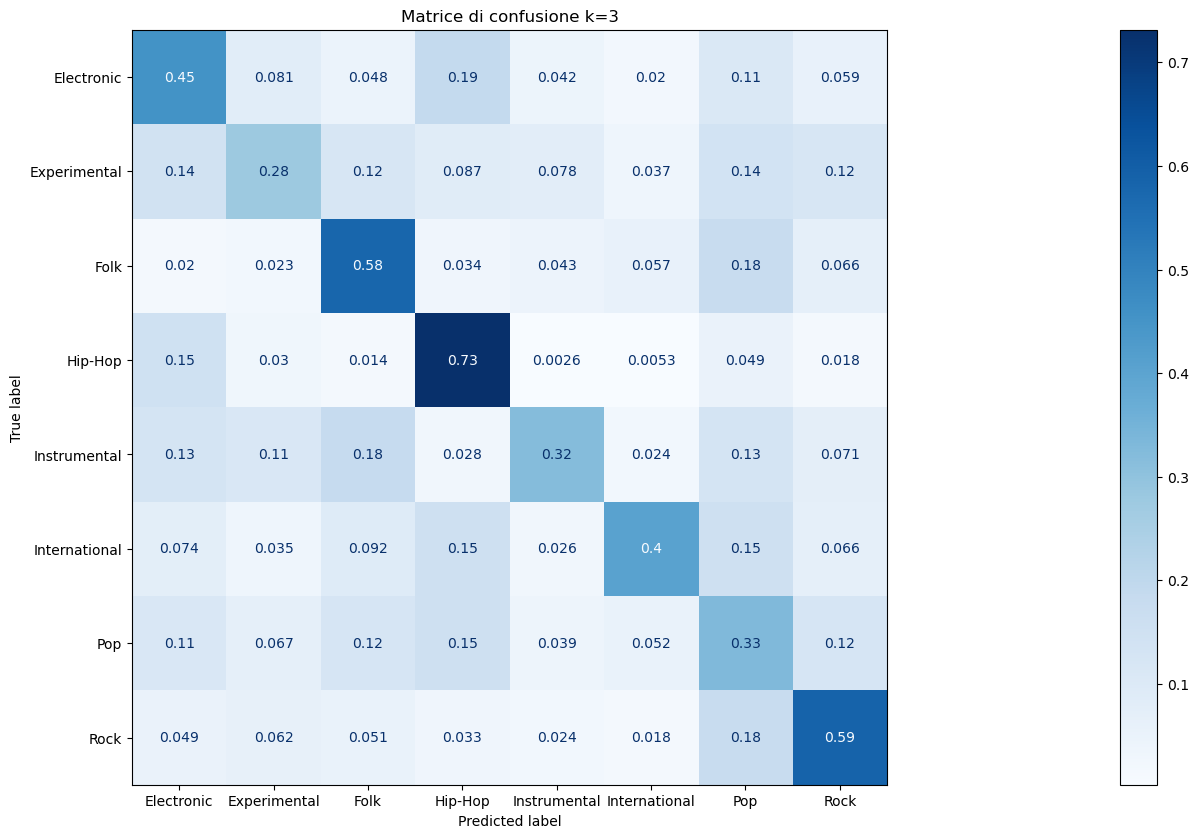

               precision    recall  f1-score   support

   Electronic       0.61      0.45      0.52      2104
 Experimental       0.28      0.28      0.28       739
         Folk       0.47      0.58      0.52       915
      Hip-Hop       0.52      0.73      0.61      1136
 Instrumental       0.44      0.32      0.37       718
International       0.45      0.40      0.43       457
          Pop       0.18      0.33      0.23       765
         Rock       0.75      0.59      0.66      2337

     accuracy                           0.50      9171
    macro avg       0.46      0.46      0.45      9171
 weighted avg       0.54      0.50      0.51      9171



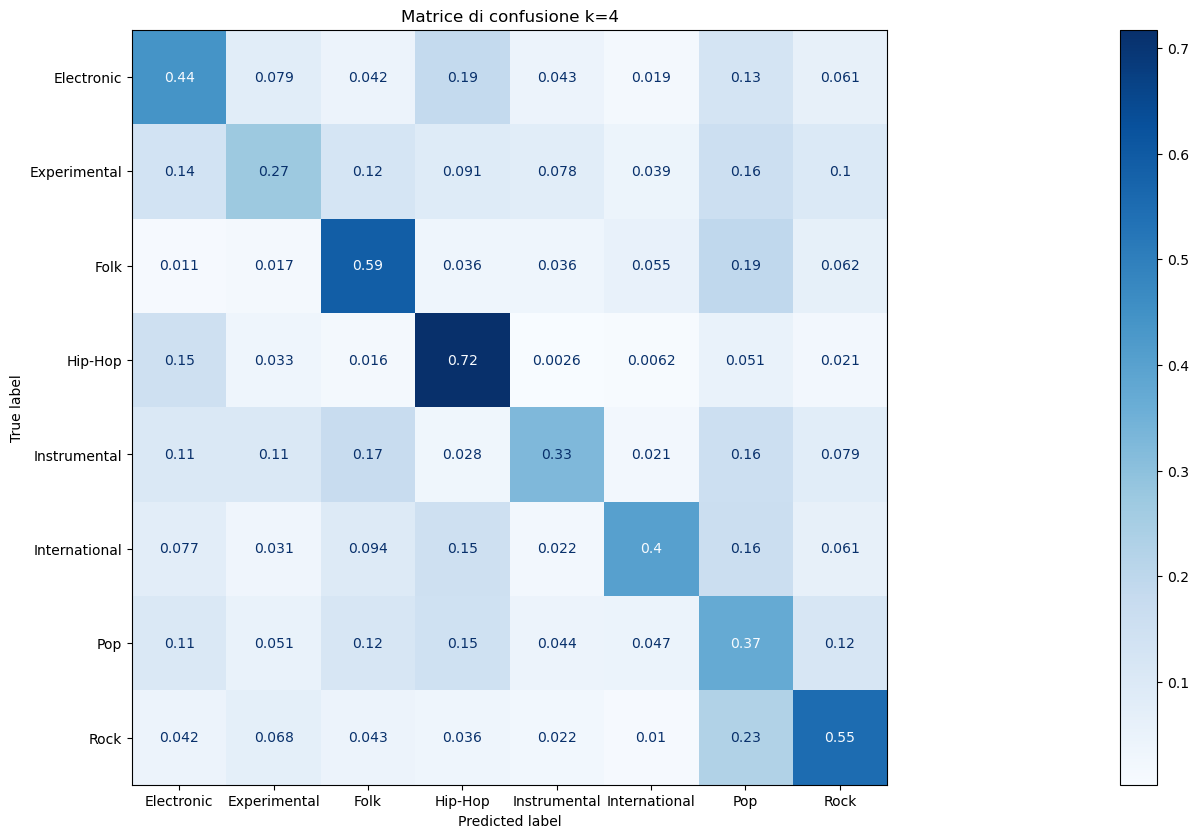

               precision    recall  f1-score   support

   Electronic       0.62      0.44      0.52      2104
 Experimental       0.28      0.27      0.28       739
         Folk       0.49      0.59      0.54       915
      Hip-Hop       0.51      0.72      0.60      1136
 Instrumental       0.45      0.33      0.38       718
International       0.48      0.40      0.44       457
          Pop       0.18      0.37      0.24       765
         Rock       0.74      0.55      0.63      2337

     accuracy                           0.49      9171
    macro avg       0.47      0.46      0.45      9171
 weighted avg       0.54      0.49      0.50      9171



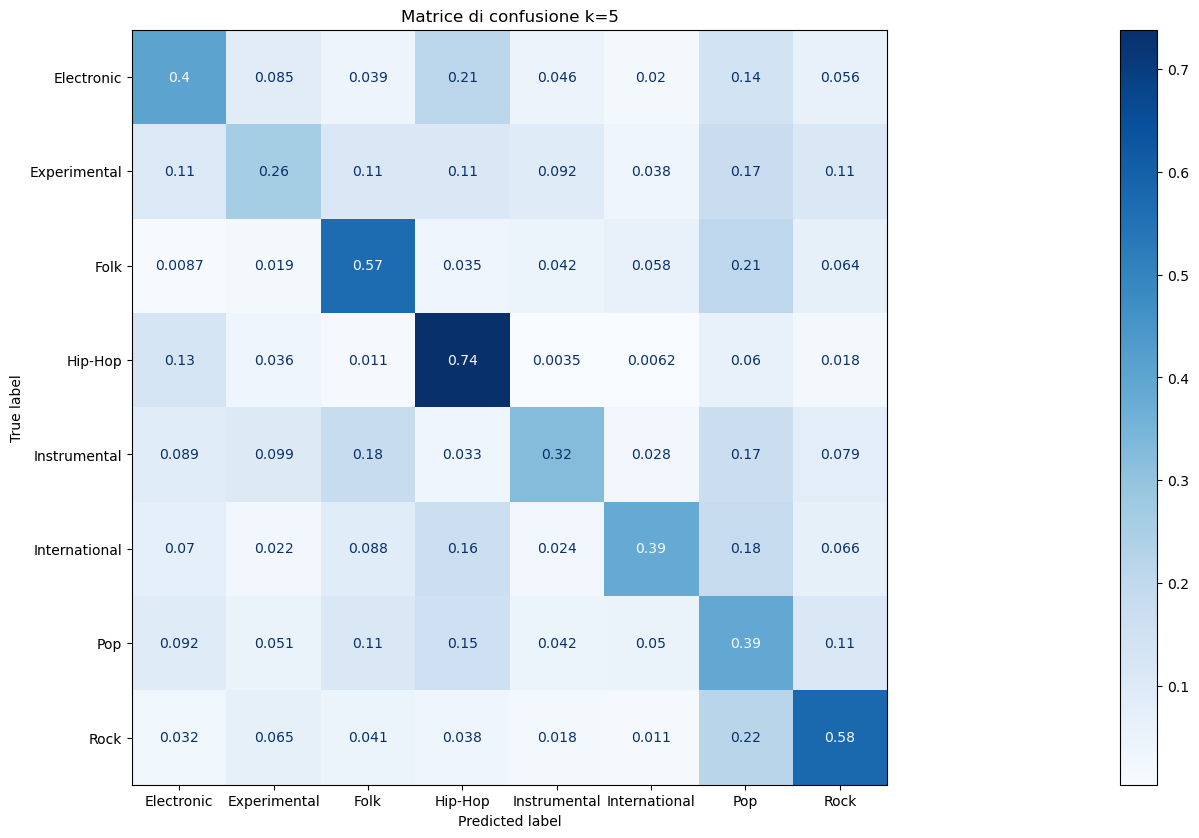

               precision    recall  f1-score   support

   Electronic       0.64      0.40      0.50      2104
 Experimental       0.28      0.26      0.27       739
         Folk       0.50      0.57      0.53       915
      Hip-Hop       0.50      0.74      0.59      1136
 Instrumental       0.44      0.32      0.38       718
International       0.45      0.39      0.42       457
          Pop       0.18      0.39      0.24       765
         Rock       0.75      0.58      0.65      2337

     accuracy                           0.49      9171
    macro avg       0.47      0.46      0.45      9171
 weighted avg       0.54      0.49      0.50      9171



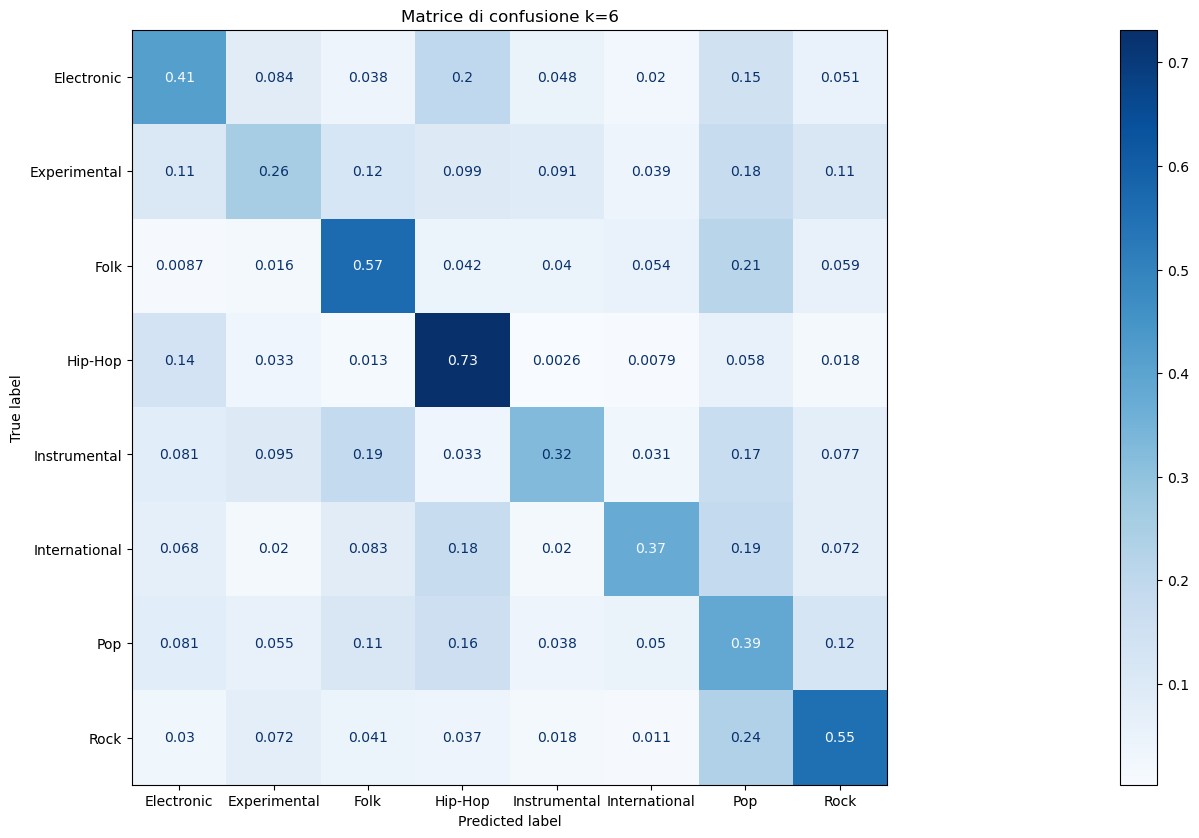

               precision    recall  f1-score   support

   Electronic       0.65      0.41      0.51      2104
 Experimental       0.27      0.26      0.26       739
         Folk       0.49      0.57      0.53       915
      Hip-Hop       0.50      0.73      0.59      1136
 Instrumental       0.45      0.32      0.38       718
International       0.44      0.37      0.41       457
          Pop       0.17      0.39      0.23       765
         Rock       0.74      0.55      0.64      2337

     accuracy                           0.48      9171
    macro avg       0.46      0.45      0.44      9171
 weighted avg       0.54      0.48      0.49      9171



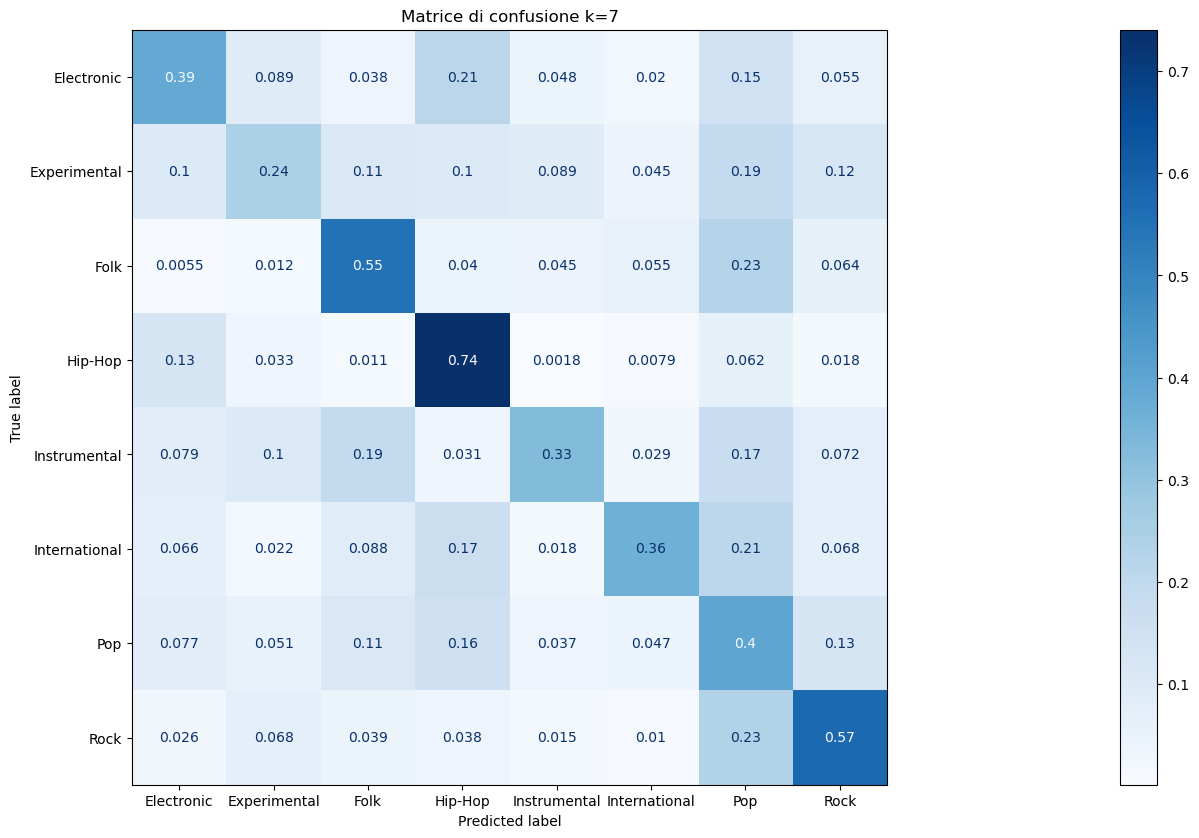

               precision    recall  f1-score   support

   Electronic       0.66      0.39      0.49      2104
 Experimental       0.26      0.24      0.25       739
         Folk       0.49      0.55      0.52       915
      Hip-Hop       0.49      0.74      0.59      1136
 Instrumental       0.46      0.33      0.38       718
International       0.44      0.36      0.40       457
          Pop       0.17      0.40      0.24       765
         Rock       0.74      0.57      0.65      2337

     accuracy                           0.48      9171
    macro avg       0.46      0.45      0.44      9171
 weighted avg       0.54      0.48      0.49      9171



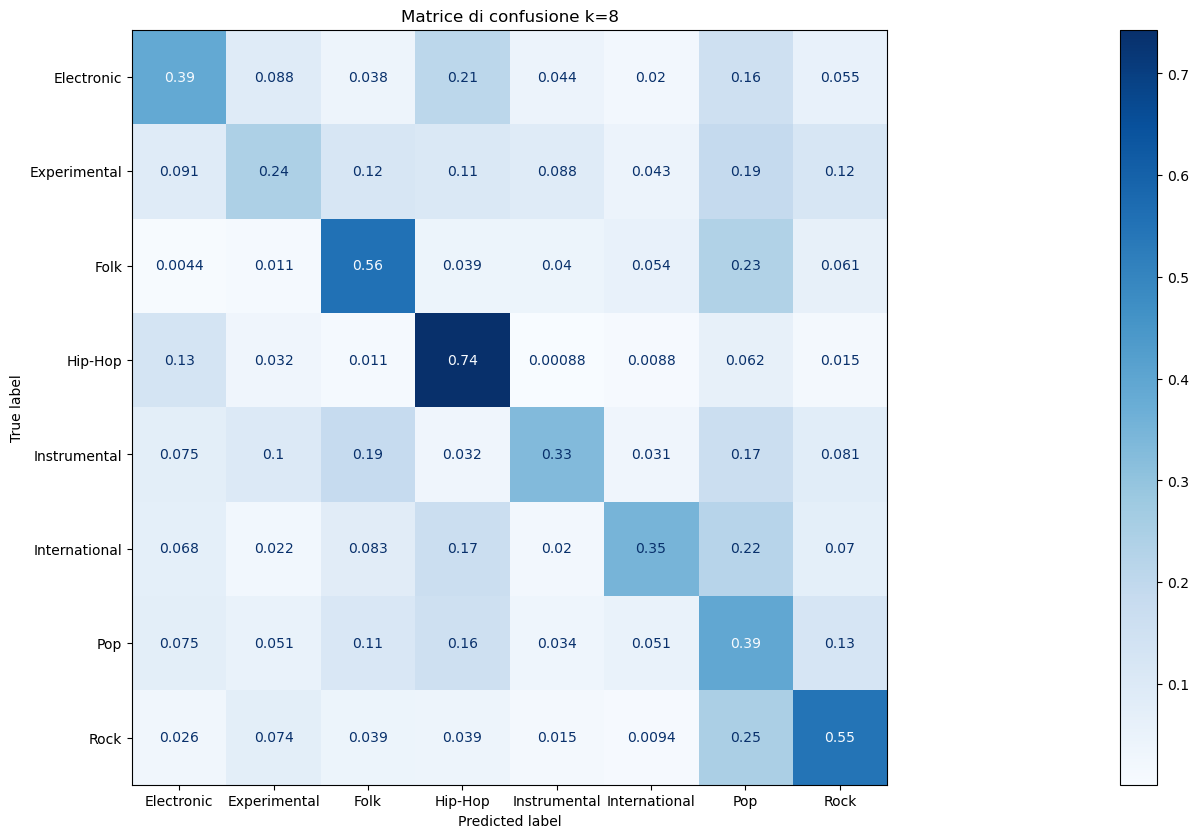

               precision    recall  f1-score   support

   Electronic       0.66      0.39      0.49      2104
 Experimental       0.25      0.24      0.25       739
         Folk       0.49      0.56      0.52       915
      Hip-Hop       0.49      0.74      0.59      1136
 Instrumental       0.47      0.33      0.39       718
International       0.42      0.35      0.38       457
          Pop       0.16      0.39      0.23       765
         Rock       0.73      0.55      0.63      2337

     accuracy                           0.47      9171
    macro avg       0.46      0.44      0.44      9171
 weighted avg       0.54      0.47      0.49      9171



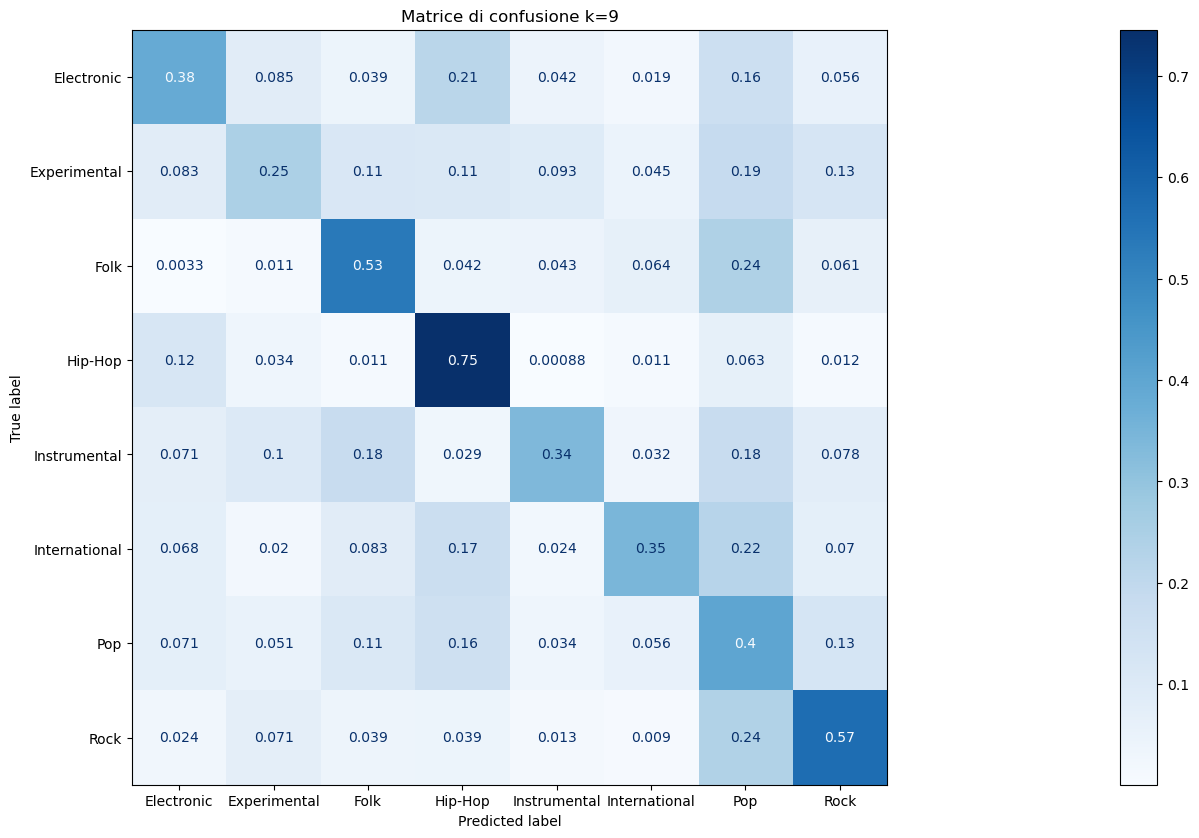

               precision    recall  f1-score   support

   Electronic       0.67      0.38      0.49      2104
 Experimental       0.26      0.25      0.25       739
         Folk       0.49      0.53      0.51       915
      Hip-Hop       0.49      0.75      0.59      1136
 Instrumental       0.48      0.34      0.40       718
International       0.41      0.35      0.37       457
          Pop       0.16      0.40      0.23       765
         Rock       0.74      0.57      0.64      2337

     accuracy                           0.48      9171
    macro avg       0.46      0.45      0.44      9171
 weighted avg       0.54      0.48      0.49      9171



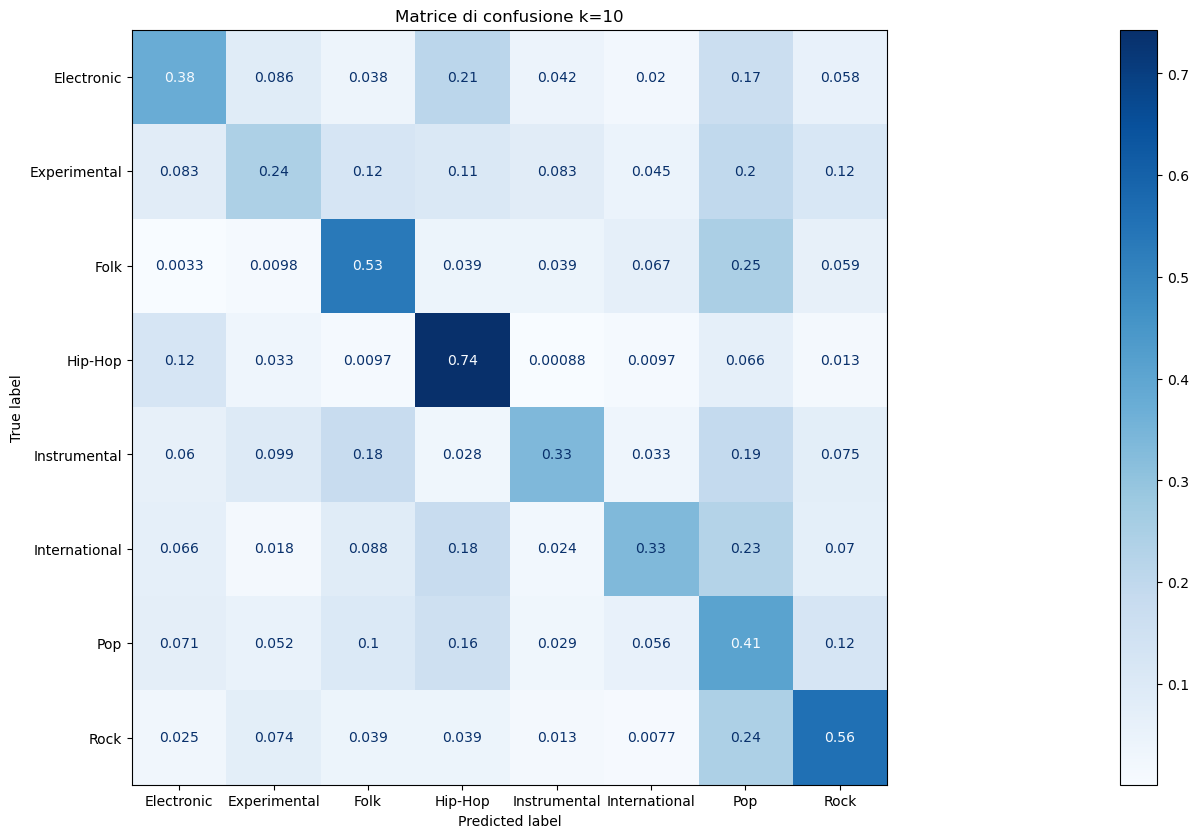

               precision    recall  f1-score   support

   Electronic       0.67      0.38      0.48      2104
 Experimental       0.26      0.24      0.25       739
         Folk       0.48      0.53      0.51       915
      Hip-Hop       0.49      0.74      0.59      1136
 Instrumental       0.49      0.33      0.40       718
International       0.39      0.33      0.36       457
          Pop       0.16      0.41      0.23       765
         Rock       0.74      0.56      0.64      2337

     accuracy                           0.47      9171
    macro avg       0.46      0.44      0.43      9171
 weighted avg       0.54      0.47      0.49      9171



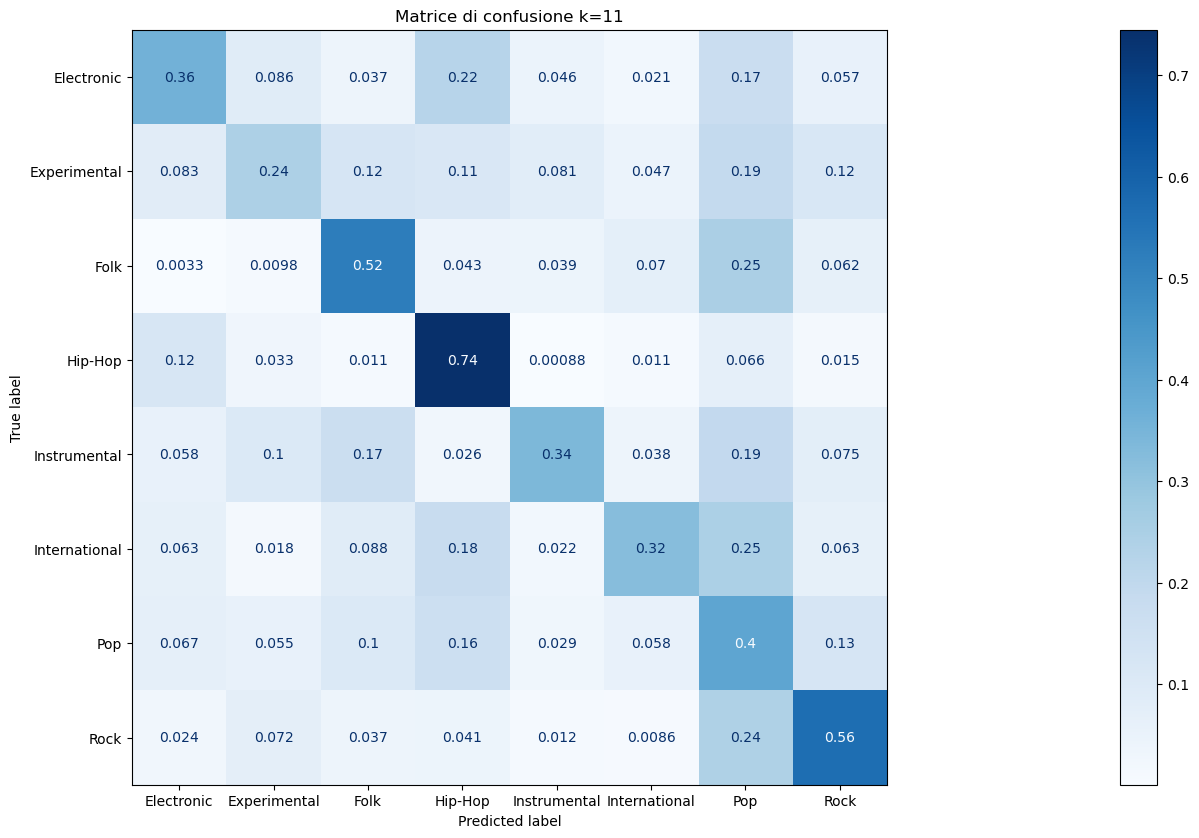

               precision    recall  f1-score   support

   Electronic       0.67      0.36      0.47      2104
 Experimental       0.26      0.24      0.25       739
         Folk       0.49      0.52      0.50       915
      Hip-Hop       0.48      0.74      0.59      1136
 Instrumental       0.49      0.34      0.40       718
International       0.37      0.32      0.35       457
          Pop       0.16      0.40      0.23       765
         Rock       0.74      0.56      0.64      2337

     accuracy                           0.47      9171
    macro avg       0.46      0.44      0.43      9171
 weighted avg       0.54      0.47      0.48      9171



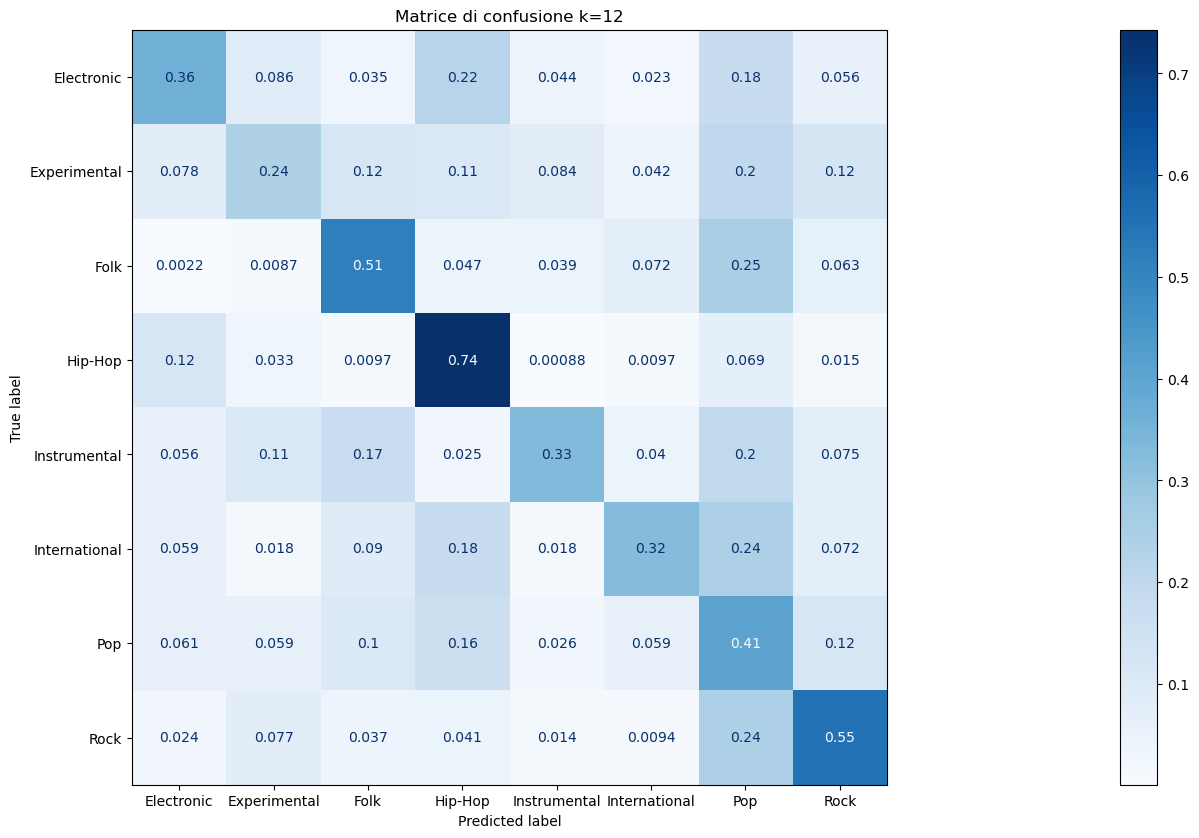

               precision    recall  f1-score   support

   Electronic       0.67      0.36      0.47      2104
 Experimental       0.25      0.24      0.24       739
         Folk       0.48      0.51      0.50       915
      Hip-Hop       0.48      0.74      0.59      1136
 Instrumental       0.48      0.33      0.39       718
International       0.37      0.32      0.34       457
          Pop       0.16      0.41      0.23       765
         Rock       0.74      0.55      0.63      2337

     accuracy                           0.46      9171
    macro avg       0.45      0.43      0.42      9171
 weighted avg       0.54      0.46      0.48      9171



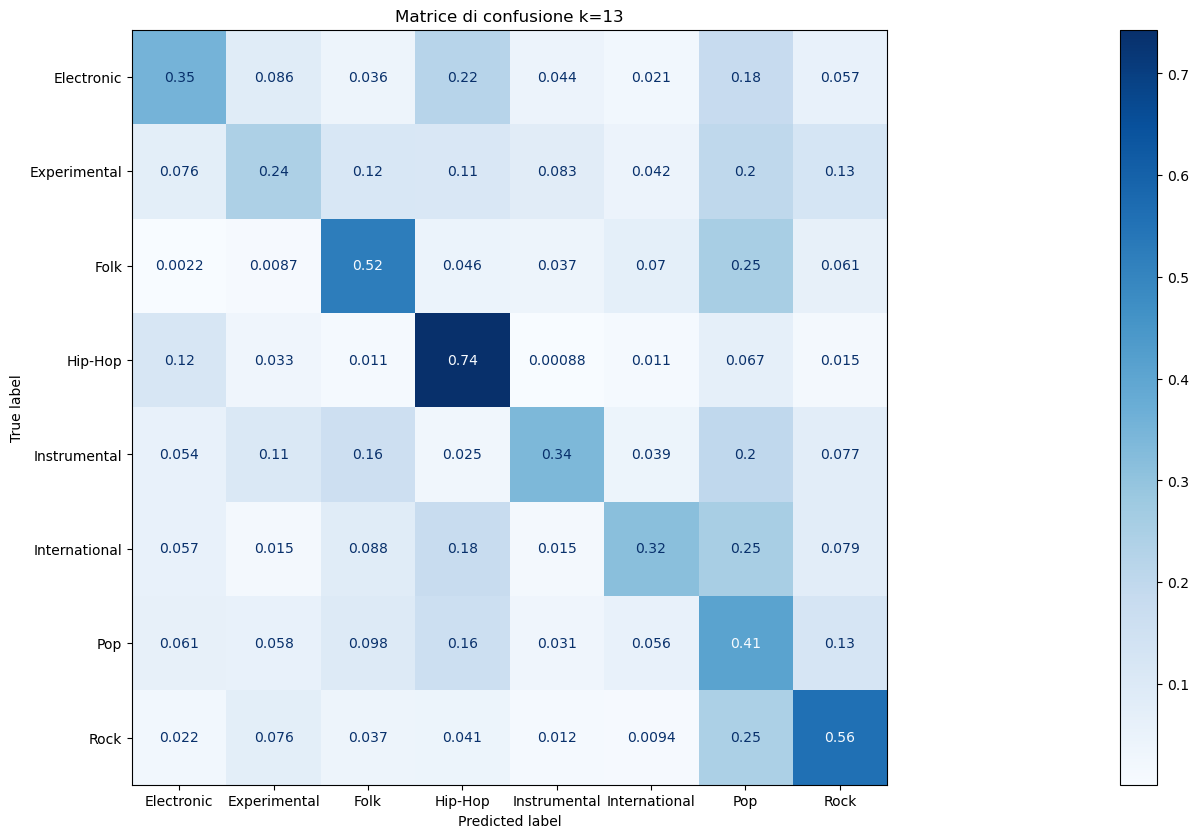

               precision    recall  f1-score   support

   Electronic       0.67      0.35      0.46      2104
 Experimental       0.25      0.24      0.25       739
         Folk       0.49      0.52      0.51       915
      Hip-Hop       0.48      0.74      0.59      1136
 Instrumental       0.49      0.34      0.40       718
International       0.37      0.32      0.34       457
          Pop       0.16      0.41      0.23       765
         Rock       0.73      0.56      0.63      2337

     accuracy                           0.46      9171
    macro avg       0.46      0.44      0.43      9171
 weighted avg       0.54      0.46      0.48      9171



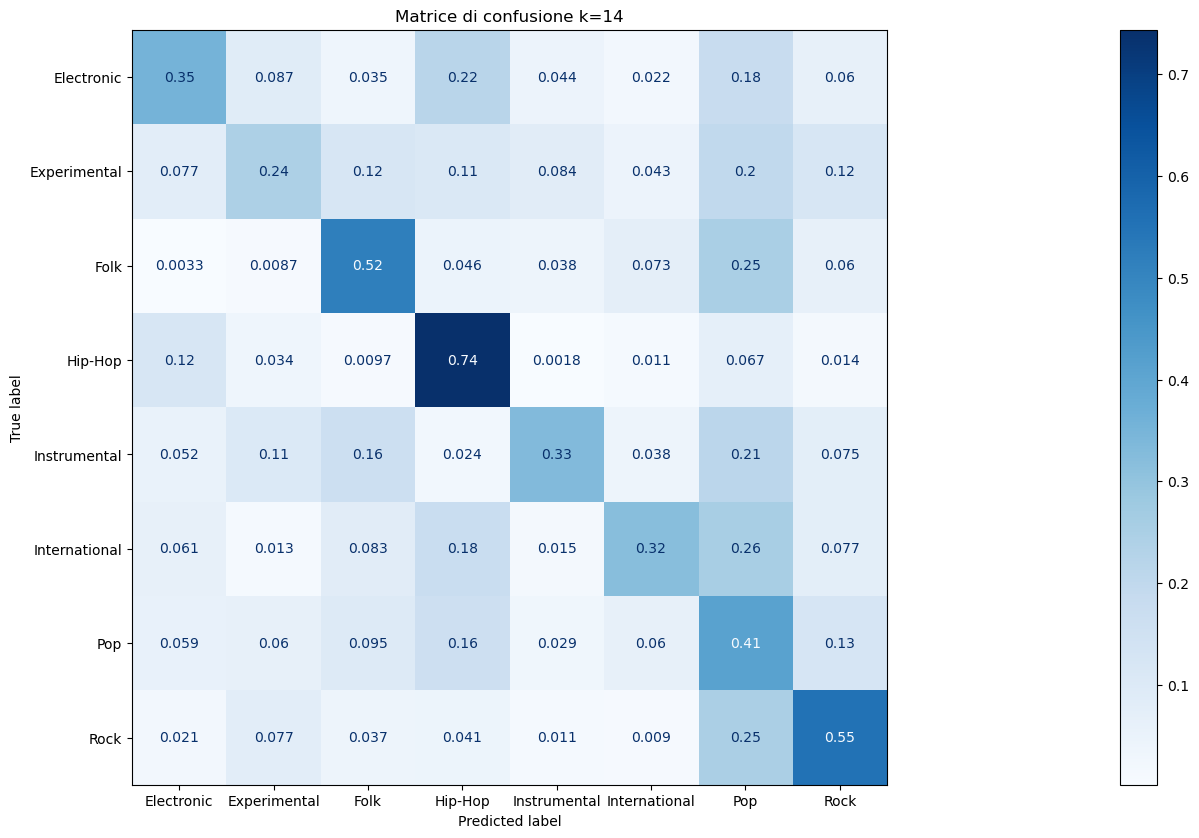

               precision    recall  f1-score   support

   Electronic       0.68      0.35      0.46      2104
 Experimental       0.25      0.24      0.25       739
         Folk       0.49      0.52      0.50       915
      Hip-Hop       0.49      0.74      0.59      1136
 Instrumental       0.49      0.33      0.40       718
International       0.37      0.32      0.34       457
          Pop       0.16      0.41      0.23       765
         Rock       0.73      0.55      0.63      2337

     accuracy                           0.46      9171
    macro avg       0.46      0.43      0.42      9171
 weighted avg       0.54      0.46      0.48      9171



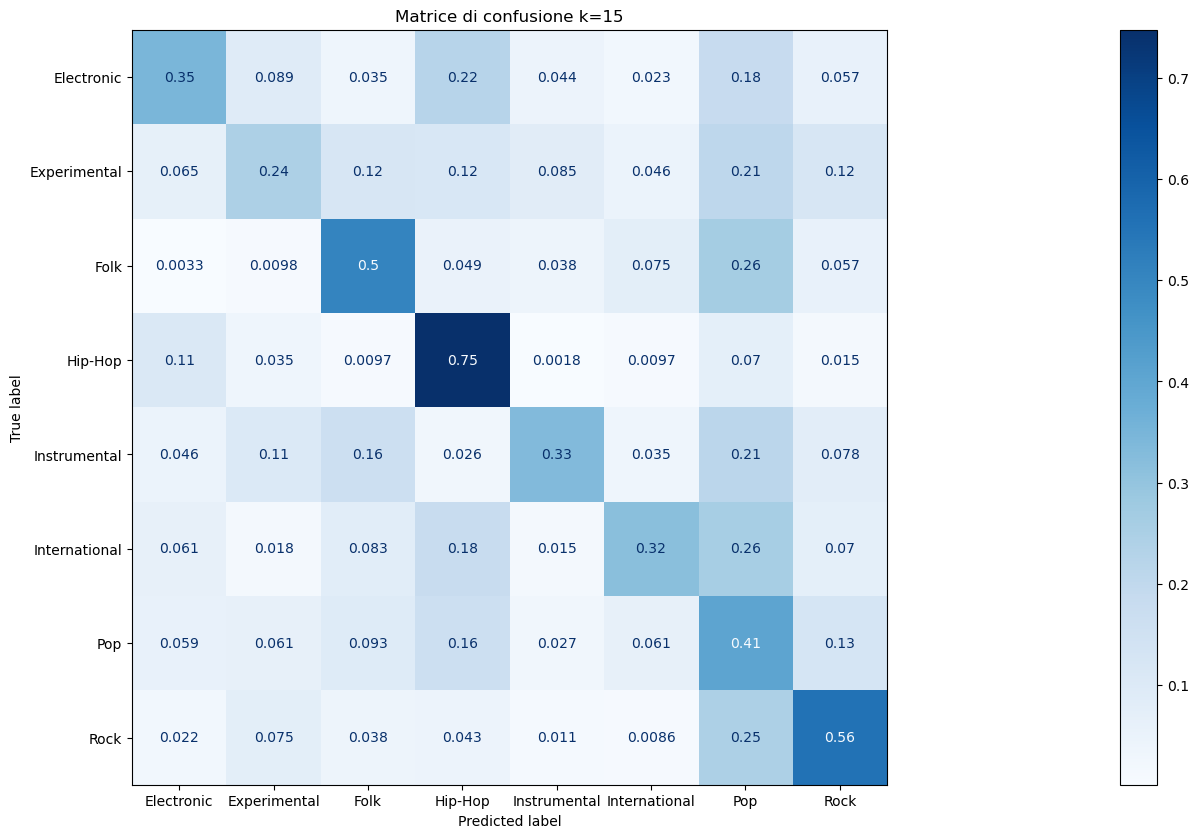

               precision    recall  f1-score   support

   Electronic       0.68      0.35      0.46      2104
 Experimental       0.25      0.24      0.25       739
         Folk       0.49      0.50      0.49       915
      Hip-Hop       0.48      0.75      0.58      1136
 Instrumental       0.49      0.33      0.40       718
International       0.36      0.32      0.34       457
          Pop       0.15      0.41      0.22       765
         Rock       0.74      0.56      0.63      2337

     accuracy                           0.46      9171
    macro avg       0.46      0.43      0.42      9171
 weighted avg       0.54      0.46      0.48      9171



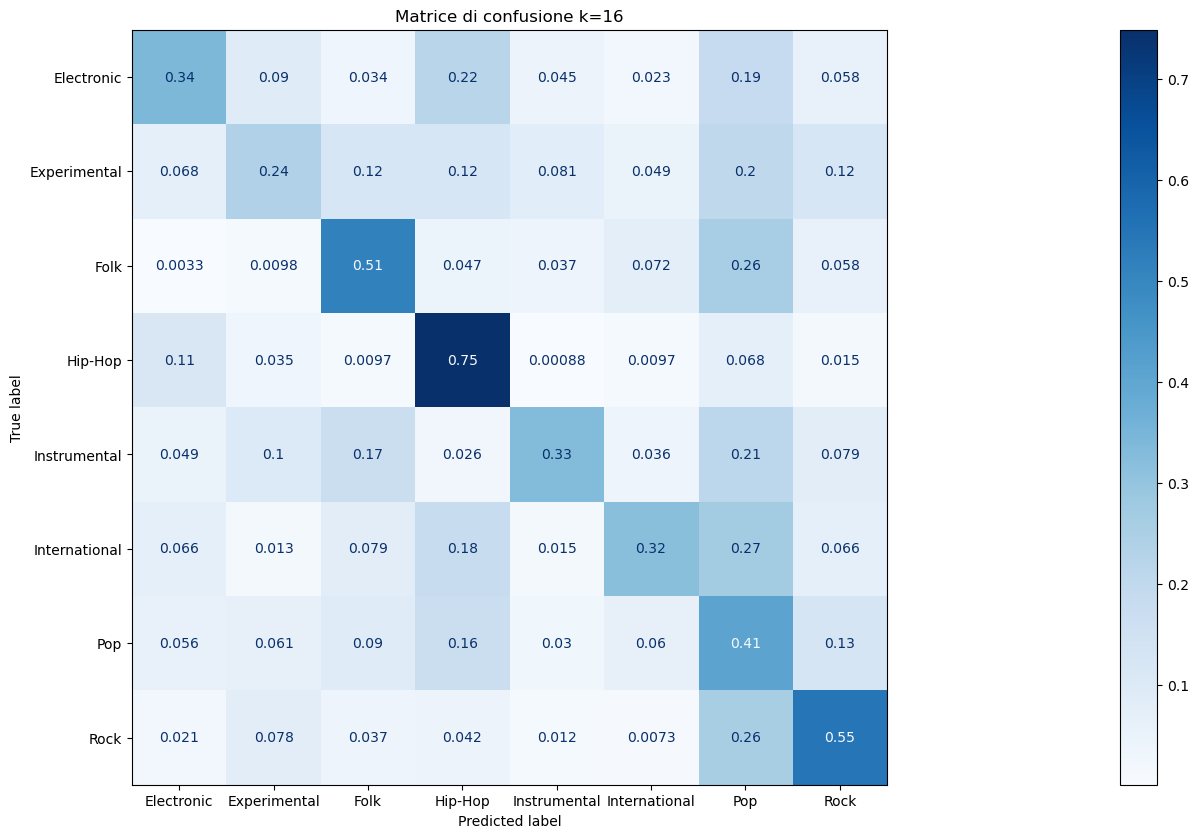

               precision    recall  f1-score   support

   Electronic       0.68      0.34      0.46      2104
 Experimental       0.24      0.24      0.24       739
         Folk       0.49      0.51      0.50       915
      Hip-Hop       0.48      0.75      0.59      1136
 Instrumental       0.49      0.33      0.39       718
International       0.37      0.32      0.34       457
          Pop       0.15      0.41      0.22       765
         Rock       0.73      0.55      0.63      2337

     accuracy                           0.46      9171
    macro avg       0.46      0.43      0.42      9171
 weighted avg       0.54      0.46      0.47      9171



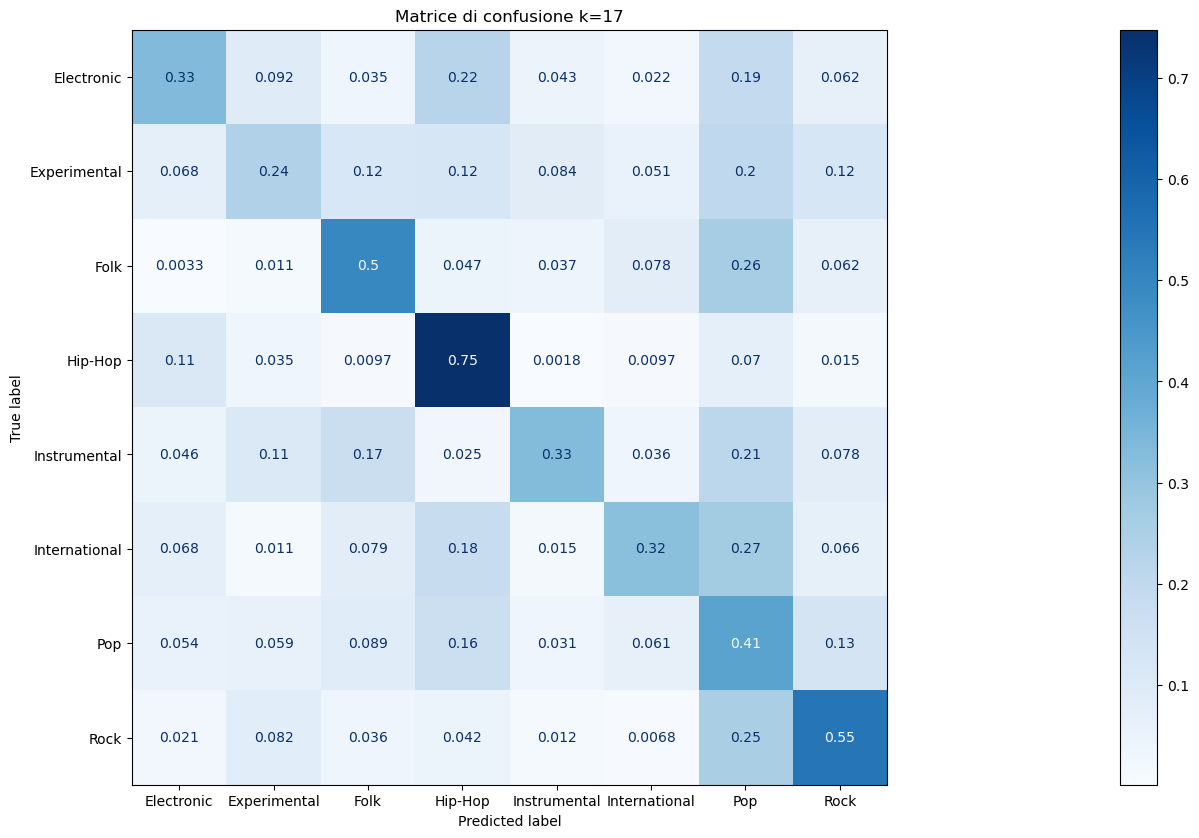

               precision    recall  f1-score   support

   Electronic       0.68      0.33      0.45      2104
 Experimental       0.24      0.24      0.24       739
         Folk       0.49      0.50      0.49       915
      Hip-Hop       0.48      0.75      0.58      1136
 Instrumental       0.49      0.33      0.39       718
International       0.36      0.32      0.34       457
          Pop       0.15      0.41      0.22       765
         Rock       0.73      0.55      0.63      2337

     accuracy                           0.45      9171
    macro avg       0.45      0.43      0.42      9171
 weighted avg       0.54      0.45      0.47      9171



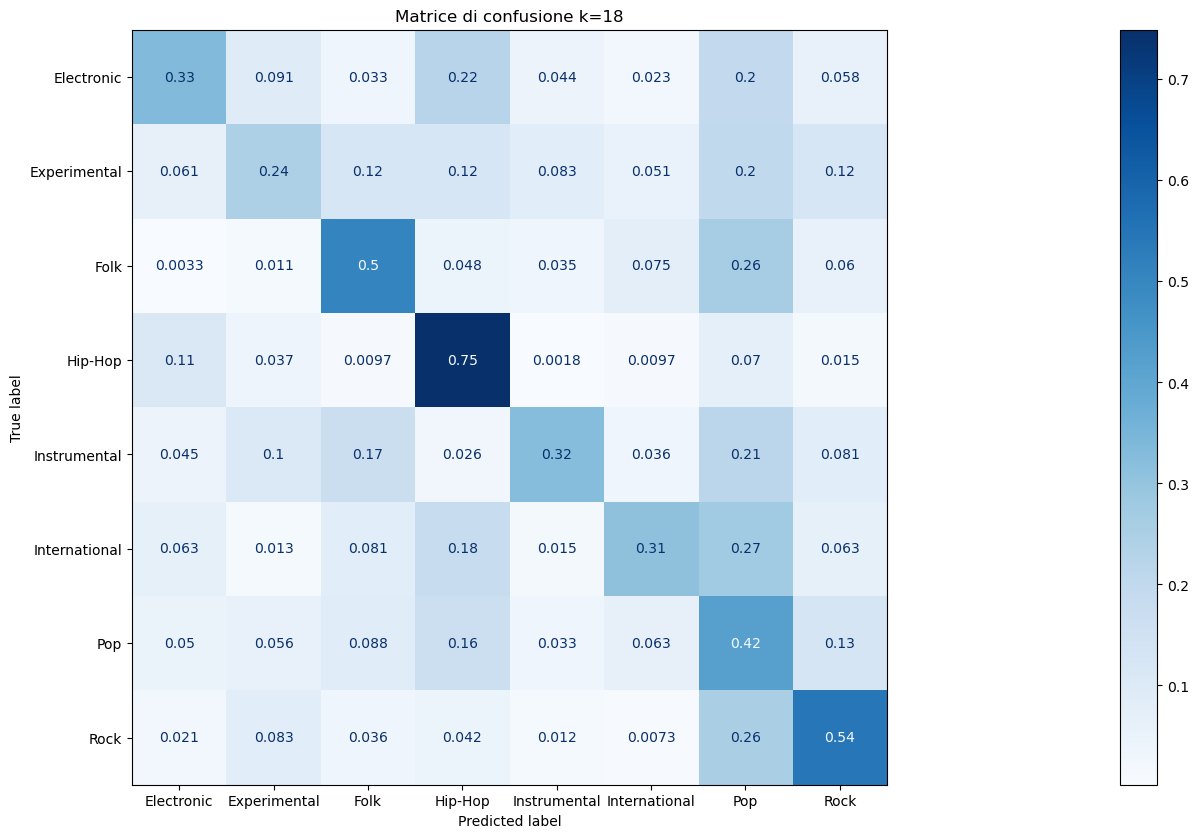

               precision    recall  f1-score   support

   Electronic       0.69      0.33      0.45      2104
 Experimental       0.24      0.24      0.24       739
         Folk       0.49      0.50      0.50       915
      Hip-Hop       0.48      0.75      0.58      1136
 Instrumental       0.49      0.32      0.39       718
International       0.36      0.31      0.33       457
          Pop       0.16      0.42      0.23       765
         Rock       0.73      0.54      0.62      2337

     accuracy                           0.45      9171
    macro avg       0.45      0.43      0.42      9171
 weighted avg       0.54      0.45      0.47      9171



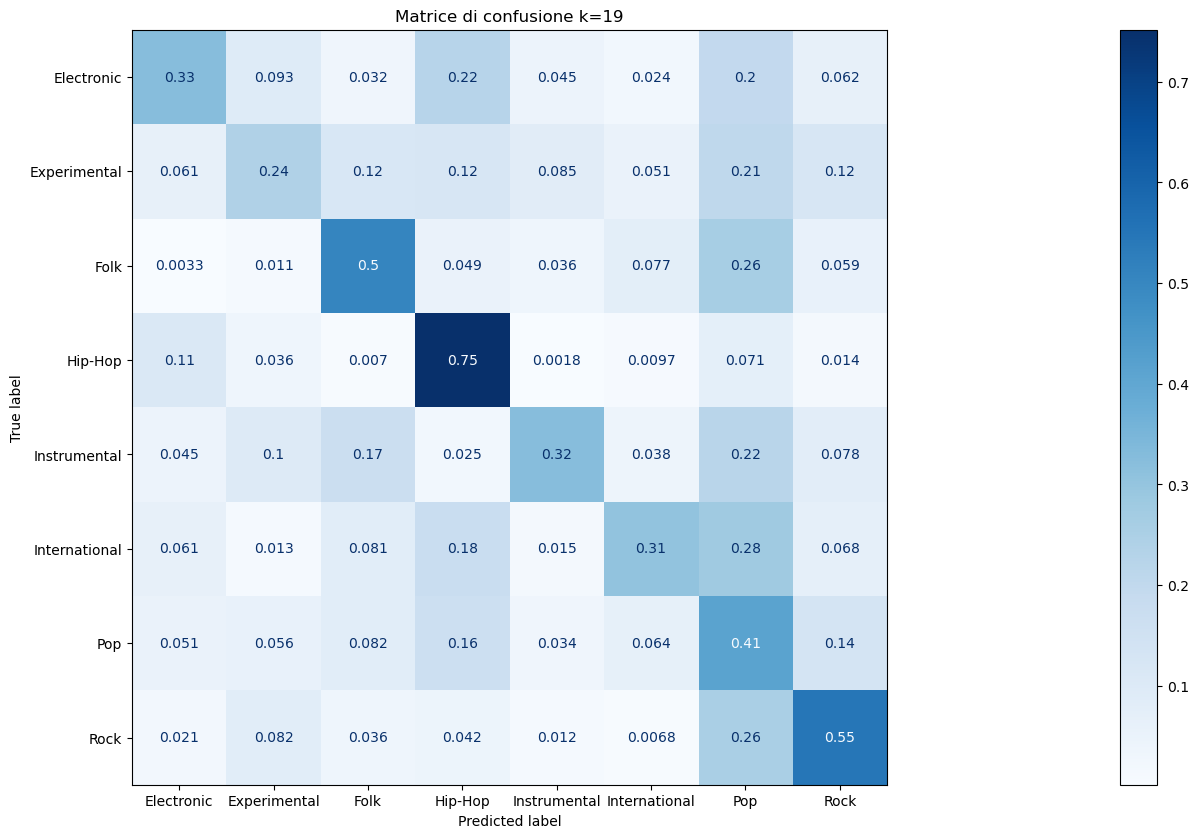

               precision    recall  f1-score   support

   Electronic       0.68      0.33      0.44      2104
 Experimental       0.24      0.24      0.24       739
         Folk       0.50      0.50      0.50       915
      Hip-Hop       0.48      0.75      0.59      1136
 Instrumental       0.48      0.32      0.39       718
International       0.35      0.31      0.33       457
          Pop       0.15      0.41      0.22       765
         Rock       0.73      0.55      0.62      2337

     accuracy                           0.45      9171
    macro avg       0.45      0.43      0.42      9171
 weighted avg       0.54      0.45      0.47      9171



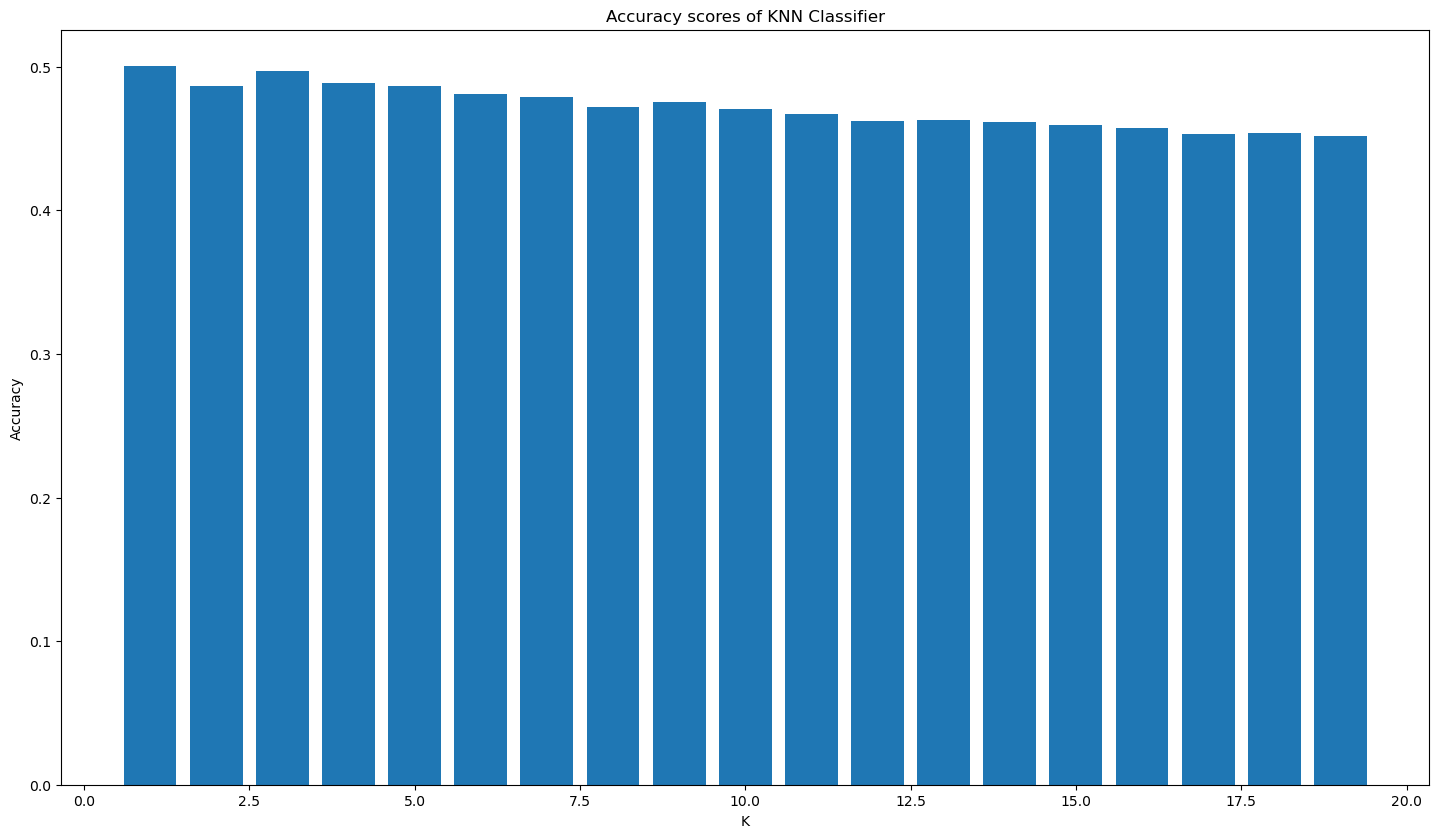

L'accuratezza massima è: 0.5007087558608657 con k = 1


['KNNClassifier.joblib']

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib

#Voglio vederer l'accuratezza in funzione di k
scores = []
k_values = range(1, 20)

#Scaling sul test set
X_test_scaled = scaler.transform(X_test)

for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_resampled, y_train_resampled)
    predictions = clf.predict(X_test_scaled)
    matrix = plot_confusion_matrix(clf, X_test_scaled, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    plt.title('Matrice di confusione k='+ str(k))
    plt.show(matrix)

    print(classification_report(y_test, predictions))

    score = accuracy_score(y_test, predictions)
    scores.append(score)
    if(score == max(scores)):
        best_clf = clf
        
plt.rcParams['figure.figsize'] = [60, 10]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.subplot(131)
plt.bar(k_values, scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy scores of KNN Classifier')
plt.show()

print("L'accuratezza massima è: " + str(max(scores)) + " con k = " + str(scores.index(max(scores))+1))

#joblib.dump(scaler, "Scaler.joblib")
joblib.dump(best_clf, "KNNClassifier.joblib")

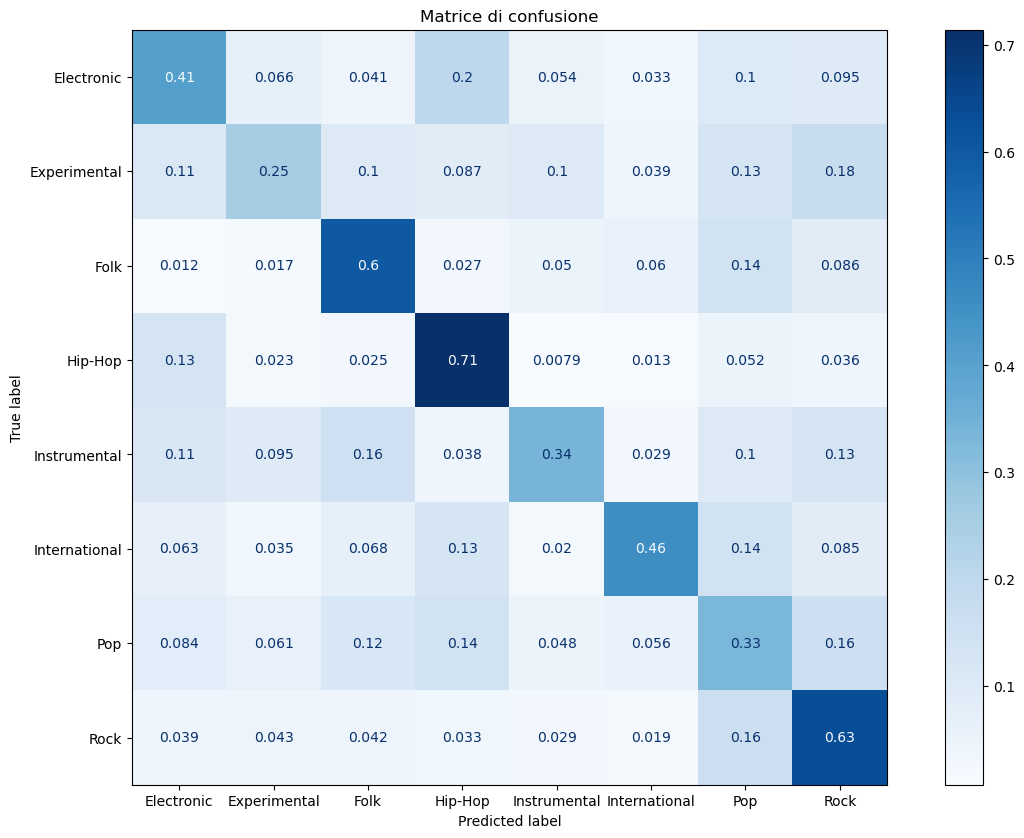

               precision    recall  f1-score   support

   Electronic       0.63      0.41      0.49      2104
 Experimental       0.31      0.25      0.28       739
         Folk       0.51      0.60      0.56       915
      Hip-Hop       0.51      0.71      0.59      1136
 Instrumental       0.41      0.34      0.37       718
International       0.43      0.46      0.44       457
          Pop       0.20      0.33      0.25       765
         Rock       0.68      0.63      0.65      2337

     accuracy                           0.50      9171
    macro avg       0.46      0.47      0.46      9171
 weighted avg       0.53      0.50      0.50      9171

Accuracy:  0.5007087558608657

Numero di tracce assegnate ad ogni classe: 
 [['Electronic' 1359]
 ['Experimental' 601]
 ['Folk' 1072]
 ['Hip-Hop' 1595]
 ['Instrumental' 600]
 ['International' 488]
 ['Pop' 1273]
 ['Rock' 2183]]


In [10]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


# Predict the test set
predictions = best_clf.predict(X_test_scaled)
# Generate confusion matrix
matrix = plot_confusion_matrix(best_clf, X_test_scaled, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Matrice di confusione')
plt.show(matrix)

print(classification_report(y_test, predictions))


print("Accuracy: ", accuracy_score(y_test, predictions))

(unique, counts) = np.unique(predictions, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print("\nNumero di tracce assegnate ad ogni classe: \n", frequencies)